In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import seaborn as sns

In [2]:
labels = np.load("labels.npy")
print(labels)

[[ 0  0]
 [ 0  0]
 [ 0  0]
 ...
 [11 59]
 [11 59]
 [11 59]]


In [3]:
clock = np.load("images.npy")
print(clock)

images = np.expand_dims(clock, axis = 3)
print(images)



[[[135 130 139 ... 144 147 150]
  [130 124 131 ... 142 143 143]
  [135 141 149 ... 153 153 153]
  ...
  [ 62  74  99 ... 110 138 129]
  [ 79  96 123 ...  72  76  94]
  [ 95  97 111 ...  70  66  82]]

 [[128 140 147 ... 140 134 134]
  [142 141 160 ... 129 122 121]
  [138 144 147 ... 120 129 134]
  ...
  [ 69  65  69 ... 101  92  90]
  [ 70  78  91 ... 102  96  92]
  [ 74  96 117 ...  99  92  82]]

 [[128 125 116 ... 153 151 150]
  [148 148 142 ... 162 163 164]
  [152 153 148 ... 157 154 151]
  ...
  [138 136 147 ...  82  70  77]
  [127 130 129 ...  99  91  98]
  [142 135 124 ... 102  94  98]]

 ...

 [[129 122 126 ... 149 150 153]
  [134 125 124 ... 144 143 144]
  [141 136 139 ... 151 150 151]
  ...
  [156 145 112 ... 123 146 142]
  [ 57  63  66 ... 102 143 141]
  [ 54  47  43 ...  97 151 149]]

 [[118 123 142 ...  99  76  87]
  [141 149 129 ... 109  95  98]
  [115 115 139 ... 113 109 101]
  ...
  [129 166 135 ...  41  70  74]
  [119 126  79 ... 106  83  70]
  [139 121  94 ...  88  82  

## Regression NN Model

In [ ]:
#build our neural network regression model

def regression_model():
    all_inputs = keras.Input(shape = (150,150,1), 
                            name = "transformed_labels")
    
    #x = layers.RandomFlip("horizontal_and_vertical")(all_inputs)
    #x = layers.RandomRotation(0.2)(x)
    
    
    x = layers.Conv2D(filters= 64, kernel_size=(7,7), kernel_initializer = tf.keras.initializers.HeUniform(),
                      padding="same", activation="relu")(all_inputs)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x)
    
    
    x = layers.Conv2D(filters= 128, kernel_size=(3,3), kernel_initializer = tf.keras.initializers.HeUniform(),
                      padding="same", activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Conv2D(filters= 128, kernel_size=(3,3), kernel_initializer = tf.keras.initializers.HeUniform(),
                      padding="same", activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x)
    
    
    
    x = layers.Conv2D(filters = 256, kernel_size=(3,3), kernel_initializer = tf.keras.initializers.HeUniform(),
                      padding="same", activation="relu")(x) 
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x)
    
    
    #dense
    x = layers.Flatten()(x)
    
    x = layers.Dense(512, activation = "relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    #x = layers.Dense(128, activation = "relu")(x)
    #x = layers.BatchNormalization()(x)
    #x = layers.Dropout(0.5)(x)
    
    
    reg_output = layers.Dense(1, name = "reg_output")(x)
    reg_model = keras.models.Model(inputs=all_inputs, outputs = reg_output)
                               
    return reg_model
    






         

In [ ]:
reg_labels = np.around((labels[:,0] + labels[:,1]/59.0), 1)

In [ ]:
print(reg_labels[800:1000])

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6
 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6
 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6
 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6
 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6
 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6
 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6
 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6
 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.7 0.7 0.7 0.7 0.7
 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7
 0.7 0.7]


In [ ]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(images, reg_labels, 
                                                                    test_size=0.2, 
                                                                    shuffle = True, random_state = 1)

In [ ]:
print(len(y_train_reg))
print(len(X_train_reg))
print(len(X_test_reg))
print(len(y_test_reg))

14400
14400
3600
3600


In [ ]:
#standardize X_train_reg and X_test_reg
X_train_reg = X_train_reg/255
X_test_reg = X_test_reg/255

In [ ]:
reg_model = regression_model()

reg_model.compile(loss = "mse",
                 optimizer = tf.keras.optimizers.Adam(0.001),
                 metrics = ["mae"])

reg_history = reg_model.fit(X_train_reg, y_train_reg, batch_size = 72, epochs = 60)

Epoch 1/60
200/200 [==============================] - 32s 77ms/step - loss: 24.7349 - mae: 3.9766
Epoch 2/60
200/200 [==============================] - 15s 77ms/step - loss: 10.4577 - mae: 2.5854
Epoch 3/60
200/200 [==============================] - 15s 77ms/step - loss: 9.4281 - mae: 2.4445
Epoch 4/60
200/200 [==============================] - 15s 77ms/step - loss: 8.6892 - mae: 2.3361
Epoch 5/60
200/200 [==============================] - 15s 77ms/step - loss: 8.2380 - mae: 2.2687
Epoch 6/60
200/200 [==============================] - 15s 77ms/step - loss: 7.2766 - mae: 2.1187
Epoch 7/60
200/200 [==============================] - 15s 77ms/step - loss: 7.0468 - mae: 2.0871
Epoch 8/60
200/200 [==============================] - 15s 77ms/step - loss: 6.2302 - mae: 1.9380
Epoch 9/60
200/200 [==============================] - 15s 77ms/step - loss: 5.8474 - mae: 1.8665
Epoch 10/60
200/200 [==============================] - 15s 77ms/step - loss: 5.5588 - mae: 1.8202
Epoch 11/60
200/200 [======

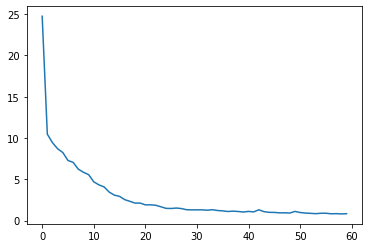

In [ ]:
plt.plot(reg_history.history["loss"])

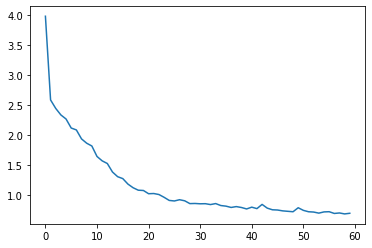

In [ ]:
plt.plot(reg_history.history["mae"])

In [ ]:
reg_score = reg_model.evaluate(X_test_reg, y_test_reg)

113/113 [==============================] - 2s 14ms/step - loss: 0.7775 - mae: 0.5132


In [ ]:
ypred_reg = reg_model.predict(X_test_reg)

In [ ]:
np.around(ypred_reg,1) #predicted values

array([[1.3],
       [3.9],
       [4. ],
       ...,
       [1.2],
       [9.1],
       [2.5]], dtype=float32)

In [ ]:
y_test_reg.reshape(-1,1) #true values

array([[ 0.6],
       [ 3.8],
       [ 2. ],
       ...,
       [ 0.6],
       [11. ],
       [ 3.2]])

In [ ]:
 time_diff =  abs(np.around(ypred_reg,1) - y_test_reg.reshape(-1,1)) # time difference

In [ ]:
np.mean(time_diff) #time difference with regression model

0.5123611225709319

## n-Class classification

In [14]:
# function to calculate true and predicted time differences
def time_gap(true, pred):
  gap = []
  for ht, hp in zip(true[:,0], pred[:,0]):
    if ht > hp and hp == 0:
      gap.append(abs(ht*60.0 + (hp + 12)*60.0))
    else:
      gap.append(abs((ht-hp)*60.0))

  minute_diff = abs(true[:,1] - pred[:,1])

  return np.mean(gap + minute_diff)

In [15]:
def n_classify(num_class):
    all_inputs = keras.Input(shape = (150,150,1), 
                            name = "n_classification")
    
    #x = layers.RandomFlip("horizontal_and_vertical")(all_inputs)
    #x = layers.RandomRotation(0.2)(x)
    
    
    x = layers.Conv2D(filters= 64, kernel_size=(7,7), kernel_initializer = tf.keras.initializers.HeUniform(),
                      padding="same", activation="relu")(all_inputs)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x)
    
    
    x = layers.Conv2D(filters= 128 , kernel_size=(3,3), kernel_initializer = tf.keras.initializers.HeUniform(),
                      padding="same", activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Conv2D(filters= 256 , kernel_size=(3,3), kernel_initializer = tf.keras.initializers.HeUniform(),
                      padding="same", activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x)
    
    
    x = layers.Conv2D(filters = 512, kernel_size=(3,3), kernel_initializer = tf.keras.initializers.HeUniform(),
                      padding="same", activation="relu")(x)  
    x = layers.MaxPooling2D(pool_size=(2,2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x)
    
    
    #dense
    x = layers.Flatten()(x)
    
    x = layers.Dense(240, activation = "relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(240, activation = "relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    
    output = layers.Dense(num_class, activation = "softmax")(x)
    #hour_output = layers.Dense(num_hour, activation="softmax", name = "hour_output")(x)  
    #minute_output = layers.Dense(num_minute, activation = "softmax", name = "minute_output")(x)
    
    model = keras.models.Model(inputs=all_inputs, outputs = output)
                               
    return model
    

#### 72 classes

In [45]:
label72 = np.array([[j]*250 for j in range(72)]).flatten()

In [46]:
Xtrain72, Xtest72, ytrain72, ytest72 = train_test_split(images, label72,
                                                       test_size=0.2, shuffle=True,
                                                       random_state=6)

In [47]:
Xtrain72 = Xtrain72/255
Xtest72 = Xtest72/255

In [48]:
mod_class72 = n_classify(72)

In [49]:
mod_class72.compile(loss = "sparse_categorical_crossentropy",
                  optimizer = tf.keras.optimizers.Adam(0.001),
                  metrics = ["accuracy"])

In [50]:
history72 = mod_class72.fit(Xtrain72, ytrain72, batch_size=72, epochs= 35)
#parameters: 64*7*7, 128*3*3, 256*3*3,  full connected laysers: 512  epoch = 35, accuracy: 0.6806
#parameters: 64*7*7, 128*3*3, 256*3*3,  full connected laysers: 512  epoch = 35, accuracy: 0.6594
#parameters: 64*7*7, 128*3*3, 256*3*3, 512*3*3 full connected laysers: 240 240  epoch = 30, accuracy: 0.7811
#parameters: 64*7*7, 128*3*3, 256*3*3, 512*3*3 full connected laysers: 240 240  epoch = 35, accuracy: 0.7881
#parameters: 64*7*7, 128*3*3, 256*3*3, 512*3*3 full connected laysers: 240 240  epoch = 35, accuracy: 0.8875


Epoch 1/35
200/200 [==============================] - 18s 84ms/step - loss: 5.0898 - accuracy: 0.0192
Epoch 2/35
200/200 [==============================] - 17s 84ms/step - loss: 4.2730 - accuracy: 0.0441
Epoch 3/35
200/200 [==============================] - 17s 84ms/step - loss: 3.5076 - accuracy: 0.1016
Epoch 4/35
200/200 [==============================] - 17s 85ms/step - loss: 2.8889 - accuracy: 0.1699
Epoch 5/35
200/200 [==============================] - 17s 85ms/step - loss: 2.4435 - accuracy: 0.2390
Epoch 6/35
200/200 [==============================] - 17s 84ms/step - loss: 2.1473 - accuracy: 0.2944
Epoch 7/35
200/200 [==============================] - 17s 85ms/step - loss: 1.9905 - accuracy: 0.3349
Epoch 8/35
200/200 [==============================] - 17s 85ms/step - loss: 1.7815 - accuracy: 0.3802
Epoch 9/35
200/200 [==============================] - 17s 85ms/step - loss: 1.6716 - accuracy: 0.4073
Epoch 10/35
200/200 [==============================] - 17s 85ms/step - loss: 1.552

In [51]:
mod_class72.evaluate(Xtest72, ytest72)

113/113 [==============================] - 2s 14ms/step - loss: 0.3512 - accuracy: 0.8875


[0.35123586654663086, 0.887499988079071]

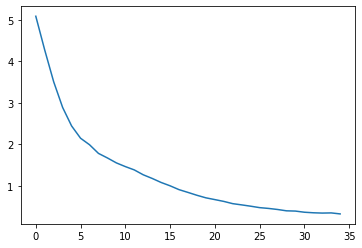

In [52]:
plt.plot(history72.history["loss"])

In [53]:
ypred72 = np.argmax(mod_class72.predict(Xtest72), axis = 1)

In [54]:
ypred72

array([21, 57, 35, ..., 48, 53, 34])

In [55]:
ytest72

array([21, 57, 35, ..., 47, 54, 34])

In [56]:
pred_label = labels[ypred72*250]

In [57]:
true_label = labels[ytest72*250]

In [58]:
time_gap(true_label, pred_label) #mean absolute error in minutes

10.722222222222221

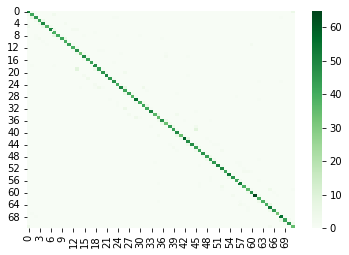

In [59]:
sns.heatmap(confusion_matrix(ytest72, ypred72), cmap="Greens")

#### 24 classes

In [ ]:
label24 = np.array([[i]*750 for i in range(24)]).flatten()

In [ ]:
Xtrain24, Xtest24, ytrain24, ytest24 = train_test_split(images, label24,
                                                       test_size=0.2, shuffle=True,
                                                       random_state=9)

In [ ]:
Xtrain24 = Xtrain24/255
Xtest24 = Xtest24/255

print(Xtrain24.shape)
print(ytrain24.shape)

(14400, 150, 150, 1)
(14400,)


In [ ]:
mod_class24 = n_classify(24)

In [ ]:
mod_class24.compile(loss = "sparse_categorical_crossentropy",
                  optimizer = tf.keras.optimizers.Adam(0.001),
                  metrics = ["accuracy"])

In [ ]:
history24 = mod_class24.fit(Xtrain24, ytrain24, batch_size=72, epochs= 45)
#parameters: 64*7*7, 128*3*3, 256*3*3,  full connected laysers: 512 accuracy: 0.8255
#parameters: 32*7*7, 64*3*3, 128*3*3,  full connected laysers: 512 accuracy: 0.6500
#parameters: 64*7*7, 128*3*3, 256*3*3,  full connected laysers: 512 accuracy: 0.8031
#parameters: 64*7*7, 128*3*3, 256*3*3,  full connected laysers: 512 accuracy: 0.7522
#parameters: 64*7*7, 128*3*3, 128*3*3,  full connected laysers: 512 accuracy: 0.6528
#parameters: 64*7*7, 128*3*3, 128*3*3, 256*3*3  full connected laysers: 512 accuracy: 0.2542
#parameters: 64*7*7, 128*3*3, 256*3*3,  full connected laysers: 512 accuracy: 0.7822
#parameters: 64*7*7, 128*3*3, 256*3*3,  full connected laysers: 512 accuracy: 0.7686
#parameters: 64*7*7, 128*3*3, 256*3*3,  full connected laysers: 512 accuracy: 0.8222  epoch=43
#parameters: 64*7*7, 128*3*3, 256*3*3, 512*3*3,  full connected laysers: 240 240 accuracy: 0.9442  epoch=45


Epoch 1/45
200/200 [==============================] - 19s 85ms/step - loss: 3.9817 - accuracy: 0.0492
Epoch 2/45
200/200 [==============================] - 17s 85ms/step - loss: 3.2728 - accuracy: 0.0851
Epoch 3/45
200/200 [==============================] - 17s 85ms/step - loss: 2.7767 - accuracy: 0.1390
Epoch 4/45
200/200 [==============================] - 17s 85ms/step - loss: 2.4061 - accuracy: 0.1944
Epoch 5/45
200/200 [==============================] - 17s 85ms/step - loss: 2.1299 - accuracy: 0.2499
Epoch 6/45
200/200 [==============================] - 17s 86ms/step - loss: 1.8972 - accuracy: 0.3195
Epoch 7/45
200/200 [==============================] - 17s 85ms/step - loss: 1.7239 - accuracy: 0.3717
Epoch 8/45
200/200 [==============================] - 17s 85ms/step - loss: 1.5363 - accuracy: 0.4270
Epoch 9/45
200/200 [==============================] - 17s 85ms/step - loss: 1.4086 - accuracy: 0.4706
Epoch 10/45
200/200 [==============================] - 17s 86ms/step - loss: 1.334

In [ ]:
score24 = mod_class24.evaluate(Xtest24,ytest24)

113/113 [==============================] - 2s 15ms/step - loss: 0.2042 - accuracy: 0.9442


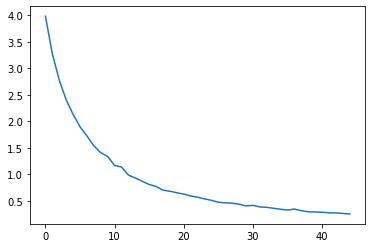

In [ ]:
plt.plot(history24.history["loss"])

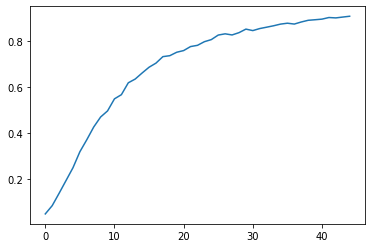

In [ ]:
plt.plot(history24.history["accuracy"])

In [ ]:
ypred24 = np.argmax(mod_class24.predict(Xtest24), axis = 1)

In [ ]:
ypred24

array([16, 23, 13, ..., 20, 15,  0])

In [ ]:
ytest24

array([16, 23, 13, ..., 20, 15,  0])

In [ ]:
lpred=labels[ypred24*750]

In [ ]:
ltrue=labels[ytest24*750]

In [ ]:
time_gap(ltrue, lpred) # MAE in minutes

6.091666666666667

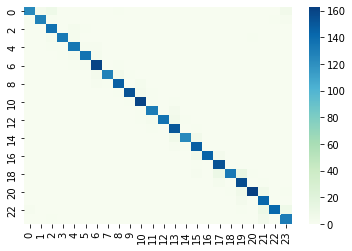

In [ ]:
sns.heatmap(confusion_matrix(ytest24, ypred24),  cmap="GnBu")

In [ ]:
history24_1 = mod_class24.fit(Xtrain24, ytrain24, batch_size=72, epochs=45)
#parameters: 64*7*7, 128*3*4, 256*3*3,  full connected laysers: 1024 accuracy: 0.60
#parameters: 64*7*7, 128*3*4, 256*3*3,  full connected laysers: 512 accuracy: 0.8344


Epoch 1/45
200/200 [==============================] - 16s 77ms/step - loss: 3.7024 - accuracy: 0.0589
Epoch 2/45
200/200 [==============================] - 15s 76ms/step - loss: 3.1482 - accuracy: 0.1084
Epoch 3/45
200/200 [==============================] - 15s 76ms/step - loss: 2.7501 - accuracy: 0.1632
Epoch 4/45
200/200 [==============================] - 15s 77ms/step - loss: 2.4862 - accuracy: 0.2144
Epoch 5/45
200/200 [==============================] - 15s 76ms/step - loss: 2.1192 - accuracy: 0.2978
Epoch 6/45
200/200 [==============================] - 15s 76ms/step - loss: 1.8336 - accuracy: 0.3666
Epoch 7/45
200/200 [==============================] - 15s 76ms/step - loss: 1.5952 - accuracy: 0.4455
Epoch 8/45
200/200 [==============================] - 15s 76ms/step - loss: 1.3834 - accuracy: 0.5082
Epoch 9/45
200/200 [==============================] - 15s 77ms/step - loss: 1.2135 - accuracy: 0.5687
Epoch 10/45
200/200 [==============================] - 15s 76ms/step - loss: 1.033

In [ ]:
mod_class24.evaluate(Xtest24,ytest24)

113/113 [==============================] - 2s 13ms/step - loss: 0.5824 - accuracy: 0.8344


[0.5824359655380249, 0.8344444632530212]

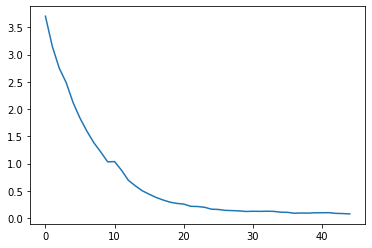

In [ ]:
plt.plot(history24_1.history["loss"])

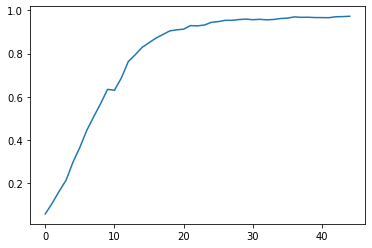

In [ ]:
plt.plot(history24_1.history["accuracy"])

In [ ]:
ypred24_1 = np.argmax(mod_class24.predict(Xtest24), axis = 1)

In [ ]:
ypred24_1

array([ 8,  8, 22, ..., 23,  1,  4])

In [ ]:
ytest24

array([ 6,  8, 22, ..., 23,  1,  5])

In [ ]:
labels[ypred24_1*750]

array([[ 4,  0],
       [ 4,  0],
       [11,  0],
       ...,
       [11, 30],
       [ 0, 30],
       [ 2,  0]])

In [ ]:
labels[ytest24*750]

array([[ 3,  0],
       [ 4,  0],
       [11,  0],
       ...,
       [11, 30],
       [ 0, 30],
       [ 2, 30]])

In [ ]:
pred_minute_24_1 = np.where(labels[ypred24_1*750][:,0] == 0, 12, labels[ypred24_1*750][:,0])*60.0 + labels[ypred24_1*750][:,1].astype("float32")

In [ ]:
pred_minute_24_1

array([240., 240., 660., ..., 690., 750., 120.])

In [ ]:
true_minute_24_1 = np.where(labels[ytest24*750][:,0] == 0, 12, labels[ytest24*750][:,0])*60.0 + labels[ytest24*750][:,1].astype("float32")

In [ ]:
true_minute_24_1

array([180., 240., 660., ..., 690., 750., 150.])

In [ ]:
np.mean(abs(true_minute_24_1 - pred_minute_24_1))

18.191666666666666

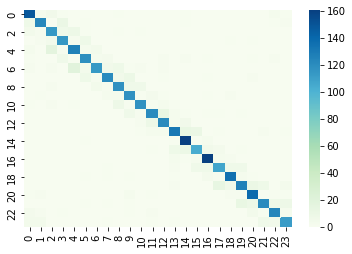

In [ ]:
sns.heatmap(confusion_matrix(ytest24, ypred24_1), cmap="GnBu")

#### 180 classes

In [6]:
label180 = np.array([[i]*100 for i in range(180)]).flatten()

In [7]:
label180

array([  0,   0,   0, ..., 179, 179, 179])

In [8]:
Xtrain180, Xtest180, ytrain180, ytest180 = train_test_split(images, label180,
                                                       test_size=0.2, shuffle=True,
                                                       random_state=5)

In [9]:
Xtrain180 = Xtrain180/255
Xtest180 = Xtest180/255

print(Xtrain180.shape)
print(ytrain180.shape)

(14400, 150, 150, 1)
(14400,)


In [10]:
mod_class180 = n_classify(180)

In [11]:
mod_class180.compile(loss = "sparse_categorical_crossentropy",
                  optimizer = tf.keras.optimizers.Adam(0.001),
                  metrics = ["accuracy"])

In [12]:
history180 = mod_class180.fit(Xtrain180, ytrain180, batch_size=72, epochs= 35)
# epoch 55, accuracy: 0.3225
# epoch 25, accuracy: 0.2419

Epoch 1/35
200/200 [==============================] - 34s 84ms/step - loss: 5.9122 - accuracy: 0.0056
Epoch 2/35
200/200 [==============================] - 17s 84ms/step - loss: 5.5552 - accuracy: 0.0078
Epoch 3/35
200/200 [==============================] - 17s 84ms/step - loss: 5.1414 - accuracy: 0.0190
Epoch 4/35
200/200 [==============================] - 17s 84ms/step - loss: 4.4795 - accuracy: 0.0464
Epoch 5/35
200/200 [==============================] - 17s 84ms/step - loss: 3.9032 - accuracy: 0.0802
Epoch 6/35
200/200 [==============================] - 17s 84ms/step - loss: 3.3110 - accuracy: 0.1353
Epoch 7/35
200/200 [==============================] - 17s 84ms/step - loss: 2.8398 - accuracy: 0.1979
Epoch 8/35
200/200 [==============================] - 17s 84ms/step - loss: 2.5639 - accuracy: 0.2306
Epoch 9/35
200/200 [==============================] - 17s 84ms/step - loss: 2.2883 - accuracy: 0.2837
Epoch 10/35
200/200 [==============================] - 17s 84ms/step - loss: 2.058

In [13]:
score180 = mod_class180.evaluate(Xtest180,ytest180)

113/113 [==============================] - 2s 16ms/step - loss: 1.3828 - accuracy: 0.6006


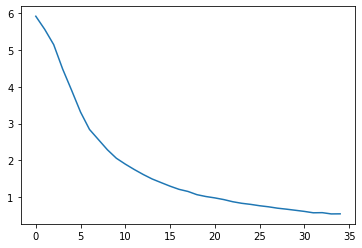

In [14]:
plt.plot(history180.history["loss"])

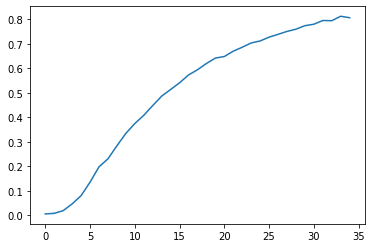

In [15]:
plt.plot(history180.history["accuracy"])

In [16]:
ypred180 = np.argmax(mod_class180.predict(Xtest180), axis = 1)

In [17]:
ypred180

array([178,  33, 119, ..., 153,  52, 113])

In [18]:
ytest180

array([162,  33, 119, ..., 153,  52, 113])

In [21]:
pred180 = labels[ypred180*100]

In [22]:
true180 = labels[ytest180*100]

In [23]:
time_gap(true180, pred180) #MAE in minutes

44.32666666666667

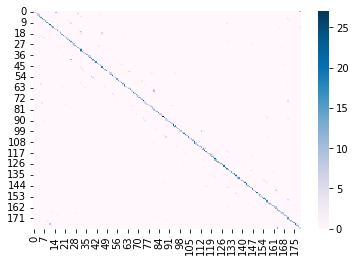

In [24]:
sns.heatmap(confusion_matrix(ytest180, ypred180), cmap="PuBu")

#### 720 classes

In [16]:
label720 = np.array([[i]*25 for i in range(720)]).flatten()

In [17]:
label720

array([  0,   0,   0, ..., 719, 719, 719])

In [18]:
Xtrain720, Xtest720, ytrain720, ytest720 = train_test_split(images, label720,
                                                       test_size=0.2, shuffle=True,
                                                       random_state=1)

In [19]:
Xtrain720 = Xtrain720/255
Xtest720= Xtest720/255

print(Xtrain720.shape)
print(ytrain720.shape)

(14400, 150, 150, 1)
(14400,)


In [20]:
mod_class720 = n_classify(720)

In [21]:
mod_class720.compile(loss = "sparse_categorical_crossentropy",
                  optimizer = tf.keras.optimizers.Adam(0.001),
                  metrics = ["accuracy"])

In [22]:
history720 = mod_class720.fit(Xtrain720, ytrain720, batch_size=72, epochs= 40)

Epoch 1/40
200/200 [==============================] - 18s 85ms/step - loss: 6.9151 - accuracy: 0.0018
Epoch 2/40
200/200 [==============================] - 17s 84ms/step - loss: 6.8010 - accuracy: 0.0016
Epoch 3/40
200/200 [==============================] - 17s 84ms/step - loss: 6.5970 - accuracy: 0.0028
Epoch 4/40
200/200 [==============================] - 17s 84ms/step - loss: 6.2625 - accuracy: 0.0065
Epoch 5/40
200/200 [==============================] - 17s 84ms/step - loss: 5.7942 - accuracy: 0.0155
Epoch 6/40
200/200 [==============================] - 17s 84ms/step - loss: 5.3370 - accuracy: 0.0265
Epoch 7/40
200/200 [==============================] - 17s 85ms/step - loss: 4.8493 - accuracy: 0.0419
Epoch 8/40
200/200 [==============================] - 17s 84ms/step - loss: 4.4144 - accuracy: 0.0565
Epoch 9/40
200/200 [==============================] - 17s 84ms/step - loss: 4.1308 - accuracy: 0.0684
Epoch 10/40
200/200 [==============================] - 17s 84ms/step - loss: 3.868

In [23]:
score720 = mod_class720.evaluate(Xtest720,ytest720)

113/113 [==============================] - 2s 15ms/step - loss: 1.6595 - accuracy: 0.4314


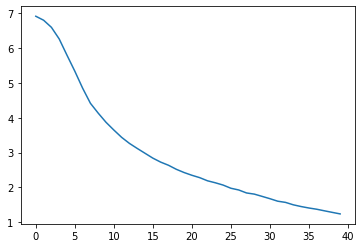

In [24]:
plt.plot(history720.history["loss"])

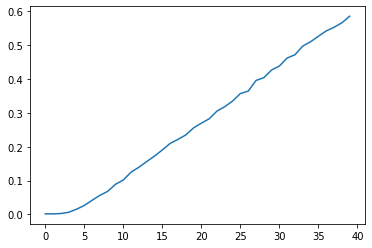

In [25]:
plt.plot(history720.history["accuracy"])

In [26]:
ypred720 = np.argmax(mod_class720.predict(Xtest720), axis = 1)

In [27]:
ypred720

array([ 34, 226, 118, ...,  34, 661, 192])

In [28]:
ytest720

array([ 35, 226, 119, ...,  34, 661, 192])

In [29]:
labels[ypred720*25]

array([[ 0, 34],
       [ 3, 46],
       [ 1, 58],
       ...,
       [ 0, 34],
       [11,  1],
       [ 3, 12]])

In [30]:
labels[ytest720*25]

array([[ 0, 35],
       [ 3, 46],
       [ 1, 59],
       ...,
       [ 0, 34],
       [11,  1],
       [ 3, 12]])

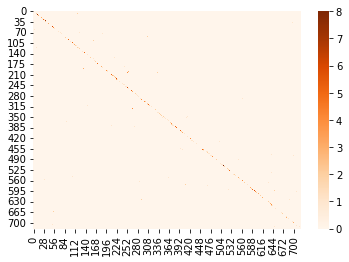

In [31]:
sns.heatmap(confusion_matrix(ytest720, ypred720), cmap="Oranges")

## Multi-output model

In [ ]:
def hour_minute(num_hour, num_minute):
    all_inputs = keras.Input(shape = (150,150,1), 
                            name = "classification_regression")
    
    #x = layers.RandomFlip("horizontal_and_vertical")(all_inputs)
    #x = layers.RandomRotation(0.2)(x)
    
    
    x = layers.Conv2D(filters= 64, kernel_size=(7,7), kernel_initializer = tf.keras.initializers.HeUniform(),
                      padding="same", activation="relu")(all_inputs)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x)
    
    
    x = layers.Conv2D(filters= 128, kernel_size=(3,3), kernel_initializer = tf.keras.initializers.HeUniform(),
                      padding="same", activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x)
    
    
    
    x = layers.Conv2D(filters = 256, kernel_size=(3,3), kernel_initializer = tf.keras.initializers.HeUniform(),
                      padding="same", activation="relu")(x)
    #x = layers.Conv2D(filters = 256, kernel_size=(3,3), kernel_initializer = tf.keras.initializers.HeUniform(),
                      #padding="same", activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Conv2D(filters = 512, kernel_size=(3,3), kernel_initializer = tf.keras.initializers.HeUniform(),
                      padding="same", activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x)
    
    
    #dense
    #x = layers.Flatten()(x)
    #x = layers.Dense(512, activation = "relu")(x)
    #x = layers.BatchNormalization()(x)
    #x = layers.Dropout(0.5)(x)
    #x = layers.Dense(256, activation = "relu")(x)
    #x = layers.BatchNormalization()(x)
    #x = layers.Dropout(0.5)(x)
    #minute_output = layers.Dense(num_minute, name = "minute_output")(x)
    
    
    x = layers.Flatten()(x)
    x = layers.Dense(144, activation = "relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(144, activation = "relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    
    hour_output = layers.Dense(num_hour, activation="softmax", name = "hour_output")(x)  
    
    x = layers.Flatten()(x)
    x = layers.Dense(200, activation = "relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    #x = layers.Dense(100, activation = "relu")(x)
    #x = layers.BatchNormalization()(x)
    #x = layers.Dropout(0.5)(x)
    #minute_output = layers.Dense(num_minute, activation = "softmax", name = "minute_output")(x)
    minute_output = layers.Dense(num_minute, name = "minute_output")(x)
    
    model = keras.models.Model(inputs=all_inputs, outputs = [hour_output, minute_output])
                               
    return model
    

In [ ]:
mod2 = hour_minute(12,1)   


In [ ]:
mod2.compile(loss = {"hour_output":"categorical_crossentropy", "minute_output":"mae"},
             loss_weights = {"hour_output":0.8, "minute_output":0.2},
             optimizer = tf.keras.optimizers.Adam(0.001),
             metrics = ["accuracy"]
            )

In [ ]:
hour_1hot = keras.utils.to_categorical(labels[:,0], num_classes=12).astype("int")
print(hour_1hot)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [ ]:
hour = labels[:,0].astype("int")
print(hour)

[ 0  0  0 ... 11 11 11]


In [ ]:
minute_1hot = keras.utils.to_categorical(labels[:,1], num_classes = 60).astype("int")
print(minute_1hot)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [ ]:
minute = labels[:,1].astype("float32")
print(minute)

[ 0.  0.  0. ... 59. 59. 59.]


In [ ]:
Xtrain2, Xtest2, ytrainh2, ytesth2, ytrainm2, ytestm2 = train_test_split(images, hour_1hot, minute, 
                                                                        test_size=0.2, shuffle=True,
                                                                        random_state=2)

In [ ]:
Xtrain2 = Xtrain2/255
Xtest2 = Xtest2/255

In [ ]:
print(Xtrain2.shape)
print(ytrainh2.shape)
print(ytrainm2.shape)

(14400, 150, 150, 1)
(14400, 12)
(14400,)


In [ ]:
history_mod2 = mod2.fit(Xtrain2, {'hour_output': ytrainh2, 'minute_output': ytrainm2}, 
                        epochs= 80, batch_size = 72)

#accuracy : 0.7389  epoch=60, fully layer = 256
#accuracy: 0.7175   epoch = 45, fully layer = 512
#accuracy: 0.8797 minute:0.0331,  epoch = 60, fully layer = 512,  cnn#3 = 128

#64*7*7, 128*3*3, 128*3*3, 256*3*3, fully layer = 256, epoch = 75, accuracy: 0.7633, 0.6761  one_hot
#64*7*7, 128*3*3, 128*3*3, 256*3*3, fully layer = 256, epoch = 75, accuracy: 0.7633, 0.6761   digit
#64*7*7, 128*3*3, 128*3*3, 256*3*3, fully layer = 144 144, 200, epoch = 60, accuracy: 0.9689, 0.8553   digit

Epoch 1/80
200/200 [==============================] - 18s 85ms/step - loss: 7.6984 - hour_output_loss: 2.9632 - minute_output_loss: 26.6392 - hour_output_accuracy: 0.1168 - minute_output_accuracy: 0.0167
Epoch 2/80
200/200 [==============================] - 17s 85ms/step - loss: 4.9906 - hour_output_loss: 2.3435 - minute_output_loss: 15.5793 - hour_output_accuracy: 0.1808 - minute_output_accuracy: 0.0163
Epoch 3/80
200/200 [==============================] - 17s 85ms/step - loss: 4.0539 - hour_output_loss: 2.0960 - minute_output_loss: 11.8857 - hour_output_accuracy: 0.2200 - minute_output_accuracy: 0.0162
Epoch 4/80
200/200 [==============================] - 17s 85ms/step - loss: 3.6766 - hour_output_loss: 1.9219 - minute_output_loss: 10.6954 - hour_output_accuracy: 0.2589 - minute_output_accuracy: 0.0160
Epoch 5/80
200/200 [==============================] - 17s 85ms/step - loss: 3.2936 - hour_output_loss: 1.7146 - minute_output_loss: 9.6096 - hour_output_accuracy: 0.3303 - minute_outpu

In [ ]:
score_mod2 = mod2.evaluate(Xtest2, [ytesth2, ytestm2])

113/113 [==============================] - 2s 16ms/step - loss: 0.4258 - hour_output_loss: 0.0917 - minute_output_loss: 1.7620 - hour_output_accuracy: 0.9706 - minute_output_accuracy: 0.0192


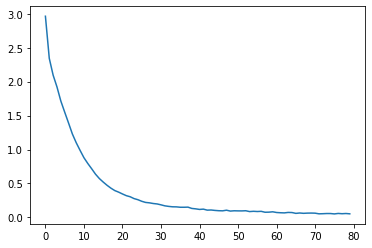

In [ ]:
plt.plot(history_mod2.history["hour_output_loss"])

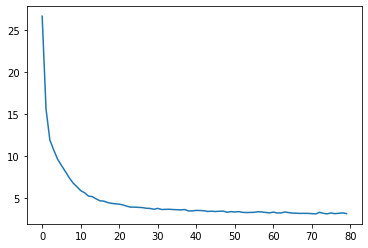

In [ ]:
plt.plot(history_mod2.history["minute_output_loss"])

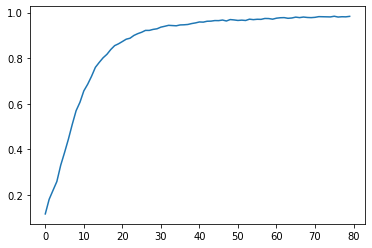

In [ ]:
plt.plot(history_mod2.history["hour_output_accuracy"])

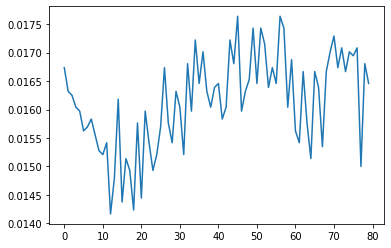

In [ ]:
plt.plot(history_mod2.history["minute_output_accuracy"])

In [ ]:
ypred_hour_values, ypred_minute_values = mod2.predict(Xtest2)

In [ ]:
ypred_hour = np.argmax(ypred_hour_values, axis = 1).astype("int")

In [ ]:
ypred_hour

array([ 4,  0, 11, ...,  5,  0,  0])

In [ ]:
ytrue_hour = np.argmax(ytesth2, axis = 1).astype("int")

In [ ]:
ytrue_hour

array([ 4,  0, 11, ...,  5,  0,  0])

In [ ]:
hour_diff = []
for h1,h2 in zip(ytrue_hour, ypred_hour):
  if h1 > h2 and h2 == 0:
    hour_diff.append(abs(h1*60.0 - (h2 + 12)*60.0))
  else:
    hour_diff.append(abs(h1*60.0 - h2*60.0))

In [ ]:
np.mean(hour_diff) # difference in minutes of from hour output

3.3

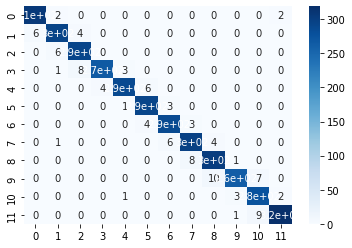

In [ ]:
sns.heatmap(confusion_matrix(ytrue_hour, ypred_hour), annot = True, cmap="Blues")

In [ ]:
ypred_minute_values.flatten()

array([50.26993  , 53.16147  , 22.781166 , ..., 29.738705 , 28.366724 ,
        2.7528582], dtype=float32)

In [ ]:
ytestm2

array([50., 50., 20., ..., 29., 29.,  5.], dtype=float32)

In [ ]:
np.mean(abs(ytestm2 - ypred_minute_values.flatten()))

1.7620379

In [ ]:
3.3 + 1.7620379  #total time errors in minutes from multi-output model

5.0620379

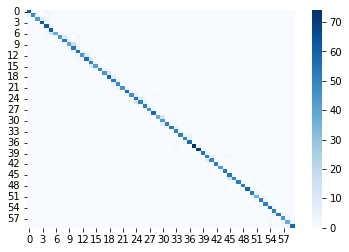

In [ ]:
sns.heatmap(confusion_matrix(ytestm2, ypred_minute), cmap="Blues") #when treat minutes as classes

In [ ]:
mod2.compile(loss = {"hour_output":"categorical_crossentropy", "minute_output":"sparse_categorical_crossentropy"},
             loss_weights = {"hour_output":1.0, "minute_output":1.0},
             optimizer = tf.keras.optimizers.Adam(0.001),
             metrics = ["accuracy"]
            )

In [ ]:

history_mod2_1 = mod2.fit(Xtrain2, {'hour_output': ytrainh2, 'minute_output': ytrainm2}, 
                        epochs= 75, batch_size = 72)

#64*7*7, 128*3*3, 128*3*3, 256*3*3,  fully connected layer = 512, epoch=70, accuracy: 0.913888871, 0.727500021 


Epoch 1/70
200/200 [==============================] - 15s 71ms/step - loss: 7.7881 - hour_output_loss: 3.0188 - minute_output_loss: 4.7693 - hour_output_accuracy: 0.1012 - minute_output_accuracy: 0.0210
Epoch 2/70
200/200 [==============================] - 14s 71ms/step - loss: 6.8054 - hour_output_loss: 2.5236 - minute_output_loss: 4.2818 - hour_output_accuracy: 0.1476 - minute_output_accuracy: 0.0301
Epoch 3/70
200/200 [==============================] - 14s 70ms/step - loss: 6.2470 - hour_output_loss: 2.2506 - minute_output_loss: 3.9965 - hour_output_accuracy: 0.1853 - minute_output_accuracy: 0.0449
Epoch 4/70
200/200 [==============================] - 14s 70ms/step - loss: 5.8256 - hour_output_loss: 2.0502 - minute_output_loss: 3.7753 - hour_output_accuracy: 0.2324 - minute_output_accuracy: 0.0528
Epoch 5/70
200/200 [==============================] - 14s 71ms/step - loss: 5.3918 - hour_output_loss: 1.8306 - minute_output_loss: 3.5612 - hour_output_accuracy: 0.2981 - minute_output_ac

In [ ]:
mod2.evaluate(Xtest2, [ytesth2, ytestm2])

113/113 [==============================] - 2s 14ms/step - loss: 1.3831 - hour_output_loss: 0.2695 - minute_output_loss: 1.1135 - hour_output_accuracy: 0.9139 - minute_output_accuracy: 0.7275


[1.3830833435058594,
 0.269546240568161,
 1.1135375499725342,
 0.9138888716697693,
 0.7275000214576721]

In [ ]:
ypred_h, ypred_m = mod2.predict(Xtest2)

In [ ]:
pred_hour_1 = np.argmax(ypred_h, axis = 1)

In [ ]:
true_hour_1 = np.argmax(ytesth2, axis=1)

In [ ]:
pred_minute_1 = np.argmax(ypred_m, axis=1)

In [ ]:
ytestm2

array([50, 50, 20, ..., 29, 29,  5])

In [ ]:
print(pred_minute_1)
print(ytestm2)

[49 51 20 ... 29 29  5]
[50 50 20 ... 29 29  5]


In [ ]:
np.mean(abs(ytestm2 - pred_minute_1))

1.3194444444444444

In [ ]:
print(pred_hour_1)
print(true_hour_1)

[ 4  0 11 ...  5  0  2]
[ 4  0 11 ...  5  0  0]


In [ ]:
hour_diff = []
for h1,h2 in zip(true_hour_1, pred_hour_1):
  if h1 > h2 and h2 == 0:
    hour_diff.append(abs(h1*60.0 - (h2 + 12)*60.0))
  else:
    hour_diff.append(abs(h1*60.0 - h2*60.0))
    

In [ ]:
np.mean(hour_diff)

10.0

In [ ]:
minutes_diff = np.mean(abs(ytestm2 - pred_minute_1)) + np.mean(hour_diff)

print(minutes_diff)

11.319444444444445


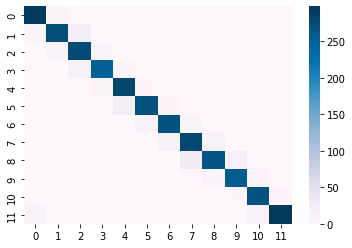

In [ ]:
sns.heatmap(confusion_matrix(true_hour_1, pred_hour_1), cmap="PuBu")

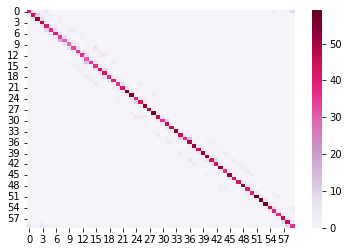

In [ ]:
sns.heatmap(confusion_matrix(ytestm2, pred_minute_1), cmap="PuRd")

### Label reform

In [92]:
timefloat = labels[:,0]*60.0 + labels[:,1].astype("float32")
print(timefloat)

[  0.   0.   0. ... 719. 719. 719.]


In [146]:
def hour_minute_reform():
    all_inputs = keras.Input(shape = (150,150,1), 
                            name = "transformed_labels")
    
    #x = layers.RandomFlip("horizontal_and_vertical")(all_inputs)
    #x = layers.RandomRotation(0.2)(x)
    
    
    x = layers.Conv2D(filters= 64, kernel_size=(7,7), kernel_initializer = tf.keras.initializers.HeUniform(),
                      padding="same", activation="relu")(all_inputs)
    x = layers.MaxPooling2D((2,2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x)
    
    
    x = layers.Conv2D(filters= 128, kernel_size=(3,3), kernel_initializer = tf.keras.initializers.HeUniform(),
                      padding="same", activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x)

    x = layers.Conv2D(filters= 256, kernel_size=(3,3), kernel_initializer = tf.keras.initializers.HeUniform(),
                      padding="same", activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2,2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.25)(x)
    
    
    x = layers.Conv2D(filters = 512, kernel_size=(3,3), kernel_initializer = tf.keras.initializers.HeUniform(),
                      padding="same", activation="relu")(x) 
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    
    
    #dense hours
    #x = layers.Flatten()(x)
    
    #x = layers.Dense(144, activation = "relu")(x)
    #x = layers.BatchNormalization()(x)
    #x = layers.Dropout(0.5)(x)
    #x = layers.Dense(144, activation = "relu")(x)
    #x = layers.BatchNormalization()(x)
    #x = layers.Dropout(0.5)(x)
    
    
    
    #hour_sin = layers.Dense(1, name = "hour_sin")(x)
    #hour_cos = layers.Dense(1, name = "hour_cos")(x)

    #dense minutes
    x = layers.Flatten()(x)
    
    x = layers.Dense(200, activation = "relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(100, activation = "relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    #minute_sin = layers.Dense(1, name = "minute_sin")(x)
    #minute_cos = layers.Dense(1, name = "minute_cos")(x)

    sin = layers.Dense(1, name = "sine")(x) #sine output
    cos = layers.Dense(1, name = "cos")(x)  #cosine output
    
    model = keras.models.Model(inputs=all_inputs, outputs = [sin, cos])
    #model = keras.models.Model(inputs=all_inputs, outputs = [hour_sin, hour_cos, minute_sin, minute_cos])
                               
                               
    return model
    

In [120]:
xlabel = np.cos(2.*np.pi*timefloat/720.0)

In [121]:
ylabel = np.sin(2.*np.pi*timefloat/720.0)

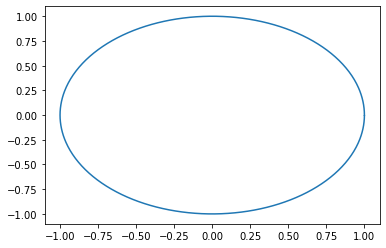

In [122]:
plt.plot(xlabel,ylabel)
plt.show()

In [147]:
mod_transform = hour_minute_reform()

In [148]:
Xtrain_reform, Xtest_reform, ytrain_sin, ytest_sin, ytrain_cos, ytest_cos = train_test_split(images,ylabel,xlabel,
                                                                            test_size = 0.2, shuffle = True,
                                                                            random_state = 6)

In [149]:
Xtrain_reform = Xtrain_reform.astype("float32")/255
Xtest_reform = Xtest_reform.astype("float32")/255

In [150]:
print(Xtrain_reform.shape)
print(ytrain_sin.shape)
print(ytrain_cos.shape)



(14400, 150, 150, 1)
(14400,)
(14400,)


In [151]:
mod_transform.compile(loss = ["mse", "mse"],
                      loss_weights = [1.0,1.0],
            optimizer = tf.keras.optimizers.Adam(0.001),
             metrics = ["mae"])

In [152]:
reform_history = mod_transform.fit(Xtrain_reform, [ytrain_sin, ytrain_cos],
                                   batch_size = 72, epochs= 55)

Epoch 1/55
200/200 [==============================] - 20s 93ms/step - loss: 3.7141 - sine_loss: 1.8855 - cos_loss: 1.8286 - sine_mae: 1.0600 - cos_mae: 1.0418
Epoch 2/55
200/200 [==============================] - 19s 93ms/step - loss: 1.5391 - sine_loss: 0.7727 - cos_loss: 0.7664 - sine_mae: 0.7246 - cos_mae: 0.7253
Epoch 3/55
200/200 [==============================] - 19s 93ms/step - loss: 1.0214 - sine_loss: 0.5072 - cos_loss: 0.5142 - sine_mae: 0.6104 - cos_mae: 0.6171
Epoch 4/55
200/200 [==============================] - 19s 93ms/step - loss: 0.8518 - sine_loss: 0.4207 - cos_loss: 0.4311 - sine_mae: 0.5574 - cos_mae: 0.5683
Epoch 5/55
200/200 [==============================] - 19s 93ms/step - loss: 0.7262 - sine_loss: 0.3577 - cos_loss: 0.3685 - sine_mae: 0.5067 - cos_mae: 0.5166
Epoch 6/55
200/200 [==============================] - 19s 93ms/step - loss: 0.6303 - sine_loss: 0.3145 - cos_loss: 0.3158 - sine_mae: 0.4709 - cos_mae: 0.4705
Epoch 7/55
200/200 [==========================

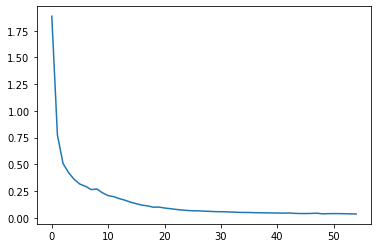

In [153]:
plt.plot(reform_history.history["sine_loss"])

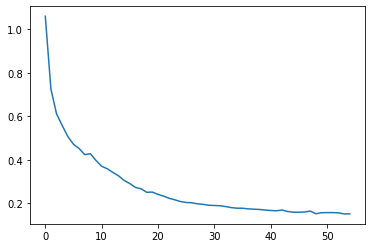

In [154]:
plt.plot(reform_history.history["sine_mae"])

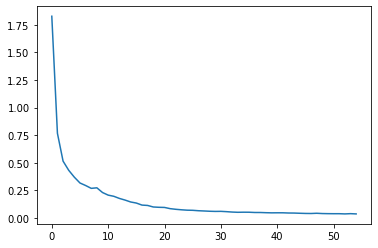

In [155]:
plt.plot(reform_history.history["cos_loss"])

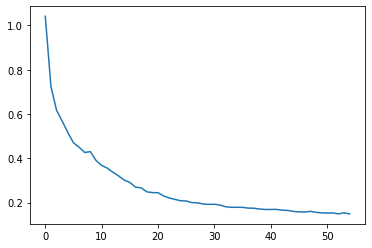

In [156]:
plt.plot(reform_history.history["cos_mae"])

In [157]:
pred_sin, pred_cos = mod_transform.predict(Xtest_reform)

In [158]:
pred_sin

array([[ 0.9383917 ],
       [-1.0120251 ],
       [-0.05247426],
       ...,
       [-0.77889603],
       [-1.014518  ],
       [ 0.33114564]], dtype=float32)

In [159]:
print(ytest_sin)

[ 0.9612617  -0.96592583  0.08715574 ... -0.8571673  -1.
  0.10452846]


In [160]:
np.mean(abs(ytest_sin - pred_sin.flatten()))

0.07051971405617859

In [161]:
pred_cos

array([[-0.22278862],
       [ 0.1974726 ],
       [-0.95449287],
       ...,
       [-0.5720619 ],
       [-0.01424259],
       [-0.8849062 ]], dtype=float32)

In [162]:
np.mean(abs(pred_cos - ytest_cos.reshape(-1,1)))

0.07069676345192179

In [163]:
print(ytest_cos)

[-2.75637356e-01  2.58819045e-01 -9.96194698e-01 ... -5.15038075e-01
 -1.83697020e-16 -9.94521895e-01]


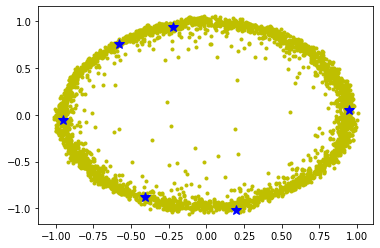

In [164]:
plt.plot(pred_cos, pred_sin, "y.")
for i in range(6):
  plt.plot(pred_cos[i], pred_sin[i], "b*", markersize=10)

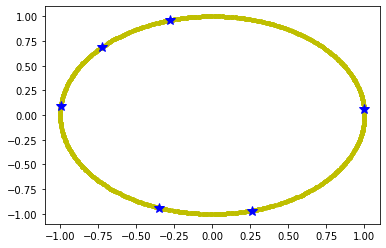

In [165]:
plt.plot(ytest_cos, ytest_sin, "y.")
for j in range(6):
  plt.plot(ytest_cos[j], ytest_sin[j], "b*", markersize=10)

In [166]:
np.arctan2(pred_sin, pred_cos) * 180/np.pi

array([[ 103.35562 ],
       [ -78.958824],
       [-176.85327 ],
       ...,
       [-126.295494],
       [ -90.804306],
       [ 159.48337 ]], dtype=float32)

In [167]:
np.arctan2(ytest_sin, ytest_cos) * 180/np.pi

array([ 106.,  -75.,  175., ..., -121.,  -90.,  174.])

In [168]:
np.mean(abs(np.arctan2(ytest_sin, ytest_cos) * 180/np.pi - (np.arctan2(pred_sin, pred_cos) * 180/np.pi).flatten()))

10.363544631204569

In [169]:
60/360 * 10.363544631204569  #error in minutes between true and predicted time

1.7272574385340946

In [ ]:
hour_x = np.cos(2*np.pi*labels[:,0]/12.0)
hour_y = np.sin(2*np.pi*labels[:,0]/12.0)

print(hour_x)
print(hour_y)

[1.        1.        1.        ... 0.8660254 0.8660254 0.8660254]
[ 0.   0.   0.  ... -0.5 -0.5 -0.5]


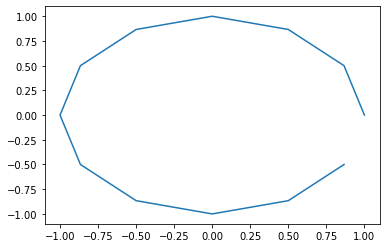

In [ ]:
plt.plot(hour_x, hour_y)

In [ ]:
minute_x = np.cos(2*np.pi*labels[:,1]/60.0)
minute_y = np.sin(2*np.pi*labels[:,1]/60.0)

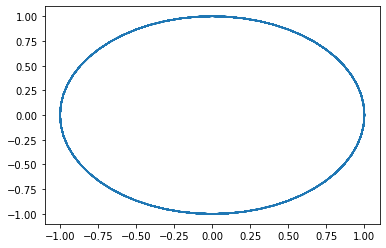

In [ ]:
plt.plot(minute_x, minute_y)

In [ ]:
model_relabel_1 = hour_minute_reform()

In [ ]:
split_1 = train_test_split(images, hour_y, hour_x, minute_y, minute_x, 
                         shuffle=True, test_size=0.2, random_state = 2)

In [ ]:
Xtrain_re_1, Xtest_re_1, ytrain_h_y, ytest_h_y, ytrain_h_x, ytest_h_x, ytrain_m_y, ytest_m_y, ytrain_m_x, ytest_m_x = split_1

In [ ]:
Xtrain_re_1 = Xtrain_re_1/255
Xtest_re_1 = Xtest_re_1/255

In [ ]:
model_relabel_1.compile(loss = ["mse","mse","mse","mse"],
                      loss_weights = [1.0,1.0,1.0,1.0],
                      optimizer = tf.keras.optimizers.Adam(0.001),
                      metrics = ['mae'])

In [ ]:
history_relabel_1 = model_relabel_1.fit(Xtrain_re_1, [ytrain_h_y, ytrain_h_x, ytrain_m_y, ytrain_m_x],
                  batch_size = 72, epochs = 55)

Epoch 1/55
200/200 [==============================] - 20s 91ms/step - loss: 7.6254 - hour_sin_loss: 1.8682 - hour_cos_loss: 2.0319 - minute_sin_loss: 1.8399 - minute_cos_loss: 1.8854 - hour_sin_mae: 1.0584 - hour_cos_mae: 1.1032 - minute_sin_mae: 1.0529 - minute_cos_mae: 1.0679
Epoch 2/55
200/200 [==============================] - 18s 91ms/step - loss: 2.8842 - hour_sin_loss: 0.7102 - hour_cos_loss: 0.7493 - minute_sin_loss: 0.7065 - minute_cos_loss: 0.7182 - hour_sin_mae: 0.6979 - hour_cos_mae: 0.7103 - minute_sin_mae: 0.7024 - minute_cos_mae: 0.7085
Epoch 3/55
200/200 [==============================] - 18s 90ms/step - loss: 1.9239 - hour_sin_loss: 0.4694 - hour_cos_loss: 0.4743 - minute_sin_loss: 0.4839 - minute_cos_loss: 0.4962 - hour_sin_mae: 0.5877 - hour_cos_mae: 0.5880 - minute_sin_mae: 0.6033 - minute_cos_mae: 0.6130
Epoch 4/55
200/200 [==============================] - 18s 90ms/step - loss: 1.5733 - hour_sin_loss: 0.3796 - hour_cos_loss: 0.3811 - minute_sin_loss: 0.4034 - minu

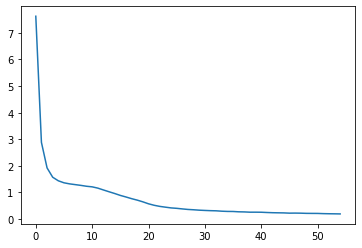

In [ ]:
plt.plot(history_relabel_1.history["loss"])

In [ ]:
pred_h_y, pred_h_x, pred_m_y, pred_m_x = model_relabel_1.predict(Xtest_re_1)

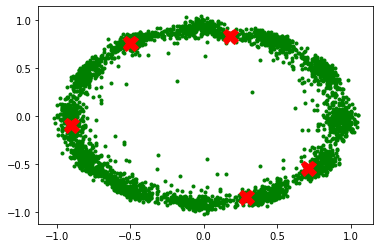

In [ ]:
plt.plot(np.around(pred_h_x,2), np.around(pred_h_y,2), "g.")
for hii in range(20,25,1):
  plt.plot(np.around(pred_h_x,2)[hii], np.around(pred_h_y,2)[hii], "rX", markersize = 15)

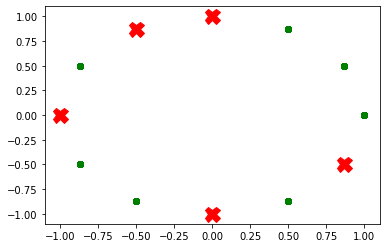

In [ ]:
plt.plot(ytest_h_x, ytest_h_y, "go")
for j in range(20,25,1):
  plt.plot(ytest_h_x[j], ytest_h_y[j], "rX", markersize = 15)

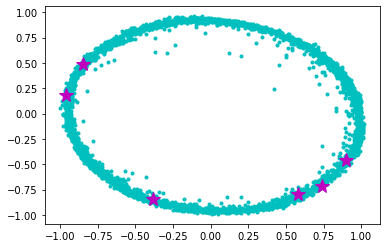

In [ ]:
plt.plot(np.around(pred_m_x,2), np.around(pred_m_y,2), "c.")
for m in range(10,16,1):
  plt.plot(np.around(pred_m_x,2)[m], np.around(pred_m_y,2)[m], "m*", markersize = 15)

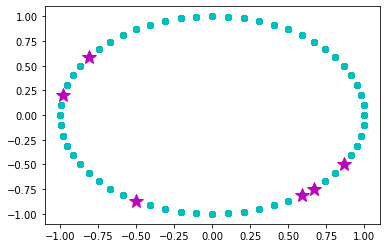

In [ ]:
plt.plot(ytest_m_x, ytest_m_y, "co")
for t in range(10,16,1):
  plt.plot(ytest_m_x[t], ytest_m_y[t], "m*", markersize = 15)

In [ ]:
pred_hour_angle_1 = np.around(np.arctan2(pred_h_y, pred_h_x) * 180 / np.pi,1)
print(pred_hour_angle_1)

[[121.3]
 [ -2.4]
 [-30.9]
 ...
 [154.7]
 [ -9.1]
 [  8.8]]


In [ ]:
true_hour_angle_1 = np.arctan2(ytest_h_y, ytest_h_x) * 180 / np.pi
print(true_hour_angle_1)

[120.   0. -30. ... 150.   0.   0.]


In [ ]:
hour_angle_gap = np.mean(abs(true_hour_angle_1 - pred_hour_angle_1.flatten()))
print(hour_angle_gap) #this gap is due to there lack one hour because we only have 0 to 11 hours in the dataset

21.51224996915708


In [ ]:
(12/360) * 21.580908922367573

0.7193636307455857

In [ ]:
pred_minute_angle_1 = np.arctan2(pred_m_y, pred_m_x) * 180 / np.pi 
print(pred_minute_angle_1)

[[-70.55585 ]
 [-61.019222]
 [111.86611 ]
 ...
 [166.47542 ]
 [177.98466 ]
 [ 15.886035]]


In [ ]:
true_minute_angle_1 = np.arctan2(ytest_m_y, ytest_m_x) * 180 / np.pi 
print(true_minute_angle_1)

[-60. -60. 120. ... 174. 174.  30.]


In [ ]:
np.mean(abs(true_minute_angle_1 - pred_minute_angle_1.flatten()))

9.264385684343676

In [170]:
(60/360) *  9.264385684343676  #this is the MAE of the model, errors between true time and predicted time

1.544064280723946